## Задача 3

## Загрузка данных
**Подключение необходимы библиотек**

In [1]:
import numpy as np # библиотека для эффективной работы с данными
import pandas as pd # библиотека для работы с наборами данных
import matplotlib.pyplot as plt # библиотека для визуализации
import seaborn as sns # еще одна библиотека для построения графиков


Используем набор данных "COVID-19" (https://www.kaggle.com/imdevskp/corona-virus-report)

In [2]:
data = pd.read_csv('covid_19_clean_complete.csv')

## Первичный анализ данных

Смотрим размер таблицы:

In [3]:
data.shape

(35775, 9)

Итак, таблица содержит 35775 строк (объектов) и 9 столбцов (признаков).

Смотрим на данные, выводим первые и последние несколько строк:

In [4]:
data.head() # отображает первые 5 записей

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,emro
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,euro
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,afro
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,euro
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,afro


In [5]:
data.tail() # отображает последние 5 записей

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
35770,NaN,Sao Tome and Principe,0.186360,6.613081,6/4/20,485,12,68,afro
35771,NaN,Yemen,15.552727,48.516388,6/4/20,453,103,0,emro
35772,NaN,Comoros,-11.645500,43.333300,6/4/20,132,2,55,afro
35773,NaN,Tajikistan,38.861034,71.276093,6/4/20,4289,48,0,euro
35774,NaN,Lesotho,-29.609988,28.233608,6/4/20,4,0,2,afro


Описание столбцов:
- Province/State – провинция исследуемой страны
- Country/Region - исследуемая страна
- Lat - широта координат точки региона
- Long - долгота координат точки региона
- Date - дата последнего измерения
- Confirmed - количество зараженных
- Deaths - количество умерших
- Recovered - количество выздоровевших
- WHO Region - часть света, в которой находится страна

    

Выводим информацию по столбцам:

In [6]:
data.info() # выводим информацию о датасете (наборе данных)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35775 entries, 0 to 35774
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  10800 non-null  object 
 1   Country/Region  35775 non-null  object 
 2   Lat             35775 non-null  float64
 3   Long            35775 non-null  float64
 4   Date            35775 non-null  object 
 5   Confirmed       35775 non-null  int64  
 6   Deaths          35775 non-null  int64  
 7   Recovered       35775 non-null  int64  
 8   WHO Region      35505 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 2.5+ MB


Определим у какого столбца с категориальными признаками больше всего уникальных значений

In [3]:
data['Province/State'].value_counts()

Falkland Islands (Malvinas)    135
Saskatchewan                   135
Quebec                         135
Western Australia              135
Saint Pierre and Miquelon      135
                              ... 
Sichuan                        135
Cayman Islands                 135
Beijing                        135
Mayotte                        135
Zhejiang                       135
Name: Province/State, Length: 80, dtype: int64

In [4]:
data['Country/Region'].value_counts()

China               4455
Canada              1890
United Kingdom      1485
France              1485
Australia           1080
                    ... 
Haiti                135
Monaco               135
Diamond Princess     135
Lesotho              135
Romania              135
Name: Country/Region, Length: 188, dtype: int64

In [5]:
data['Date'].value_counts()

1/23/20    265
4/11/20    265
2/20/20    265
5/14/20    265
2/17/20    265
          ... 
3/16/20    265
5/20/20    265
4/22/20    265
3/10/20    265
3/17/20    265
Name: Date, Length: 135, dtype: int64

In [6]:
data['WHO Region'].value_counts()

euro     10800
wpro      7425
afro      6480
paho      6480
emro      2970
searo     1350
Name: WHO Region, dtype: int64

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,emro
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,euro
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,afro
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,euro
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,afro


Видим, что есть пропуски в данных в столбцах "Province/State" и "WHO Region".

Посмотрим на статистики численных данных:

In [7]:
data.describe() # статистический анализ числовых столбцов

,Lat,Long,Confirmed,Deaths,Recovered
count,35775.000000,35775.000000,3.577500e+04,35775.000000,35775.000000
mean,21.181891,22.881195,6.826660e+03,442.688833,2305.175905
std,24.904220,70.245410,5.716821e+04,3831.352436,15755.707395
min,-51.796300,-135.000000,-1.000000e+00,-1.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,4.300000e+01,0.000000,2.000000
75%,41.153300,78.000000,6.455000e+02,9.000000,148.000000
max,71.706900,178.065000,1.872660e+06,108211.000000,485002.000000


Коррелияция признаков:

In [8]:
data.corr()

,Lat,Long,Confirmed,Deaths,Recovered
Lat,1.000000,-0.128210,0.066800,0.080840,0.071031
Long,-0.128210,1.000000,-0.067006,-0.073704,-0.033323
Confirmed,0.066800,-0.067006,1.000000,0.931290,0.845463
Deaths,0.080840,-0.073704,0.931290,1.000000,0.796682
Recovered,0.071031,-0.033323,0.845463,0.796682,1.000000


## Подготовка данных

### Обработка пустых значений

**Заполнение строк с пропущенными значениями**

Пропущенные данные о провинции заменим на значение "Whole".

In [4]:
Whole = 'Whole'
data['Province/State'].fillna(value=Whole,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35775 entries, 0 to 35774
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  35775 non-null  object 
 1   Country/Region  35775 non-null  object 
 2   Lat             35775 non-null  float64
 3   Long            35775 non-null  float64
 4   Date            35775 non-null  object 
 5   Confirmed       35775 non-null  int64  
 6   Deaths          35775 non-null  int64  
 7   Recovered       35775 non-null  int64  
 8   WHO Region      35505 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 2.5+ MB


### Обработка категориальных признаков

**Кодируем столбец из категориального признака (Label Encoding)**

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data['Province/State'])
data['Province/State'] = label.transform(data['Province/State'])

label2 = LabelEncoder()
label2.fit(data['Country/Region'])
data['Country/Region'] = label2.transform(data['Country/Region'])

label3 = LabelEncoder()
label3.fit(data['Date'])
data['Date'] = label3.transform(data['Date'])

In [6]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,76,0,33.0000,65.0000,0,0,0,0,emro
1,76,1,41.1533,20.1683,0,0,0,0,euro
2,76,2,28.0339,1.6596,0,0,0,0,afro
3,76,3,42.5063,1.5218,0,0,0,0,euro
4,76,4,-11.2027,17.8739,0,0,0,0,afro


Удалим данные о местоположении страны за ненадобностью

In [7]:
data = data.drop(['Lat','Long','WHO Region'],axis=1)

**Нормализация признаков.**

Посмотрим на распределение числа умерших, заболевших и выздоровевших по датам

Text(0, 0.5, 'Confirmed')

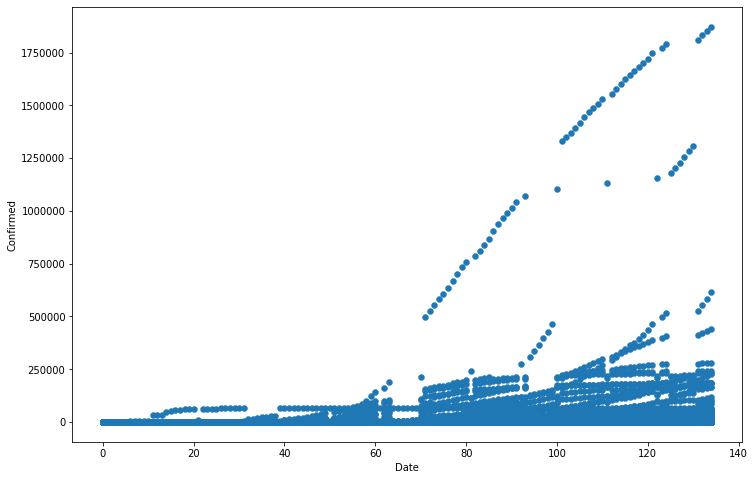

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(data['Date'],data['Confirmed'], linewidth=0.4)

plt.xlabel('Date')
plt.ylabel('Confirmed')

Text(0, 0.5, 'Deaths')

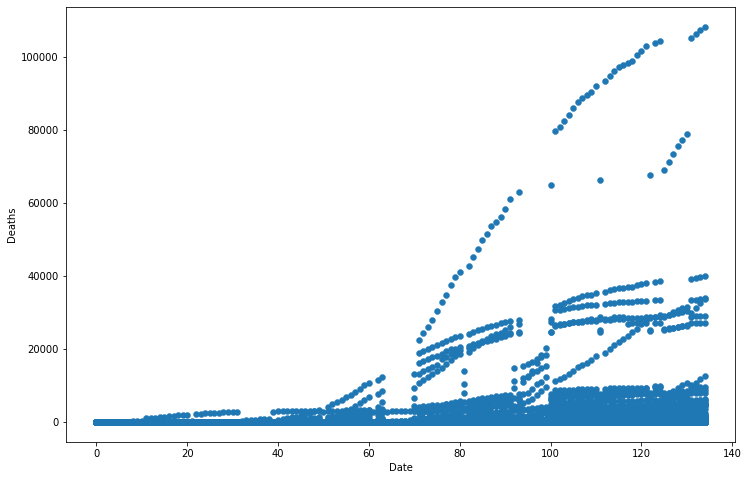

In [63]:
plt.figure(figsize=(12,8))
plt.scatter(data['Date'],data['Deaths'], linewidth=0.4)

plt.xlabel('Date')
plt.ylabel('Deaths')

Text(0, 0.5, 'Confirmed')

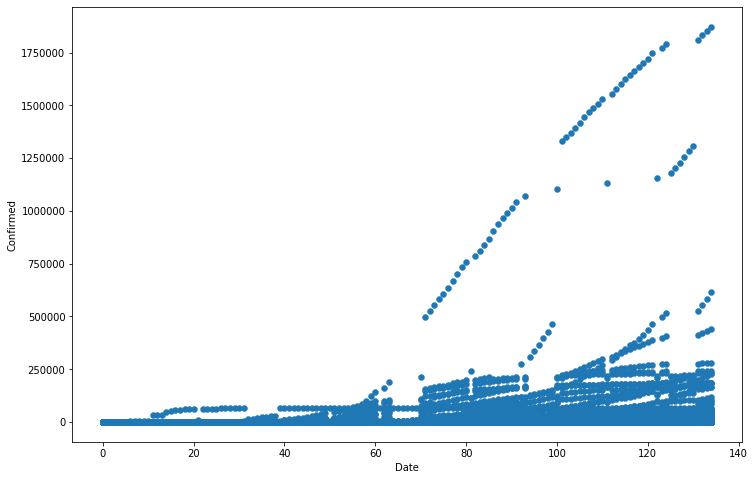

In [64]:
#посмотрим на результат нормализации
plt.figure(figsize=(12,8))
plt.scatter(data['Date'],data['Confirmed'], linewidth=0.4)

plt.xlabel('Date')
plt.ylabel('Confirmed')

**Нормализация признаков. Стандартное отклонение (Z-масштабирование)**

In [8]:
# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 
scale_features_std = StandardScaler() 
features_std = scale_features_std.fit_transform(data[['Confirmed','Deaths','Recovered']]) 
features_std
data[['Confirmed','Deaths', 'Recovered']] = features_std
features_std[0:20]

array([[-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ],
       [-0.11941523, -0.11554537, -0.1463094 ]])

In [67]:
data.tail()

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,WHO Region
35770,76,145,134,-0.110931,-0.112413,-0.141993,afro
35771,76,185,134,-0.111491,-0.088662,-0.146309,emro
35772,76,38,134,-0.117106,-0.115023,-0.142819,afro
35773,76,166,134,-0.044390,-0.103017,-0.146309,euro
35774,76,97,134,-0.119345,-0.115545,-0.146182,afro


Text(0, 0.5, 'Confirmed')

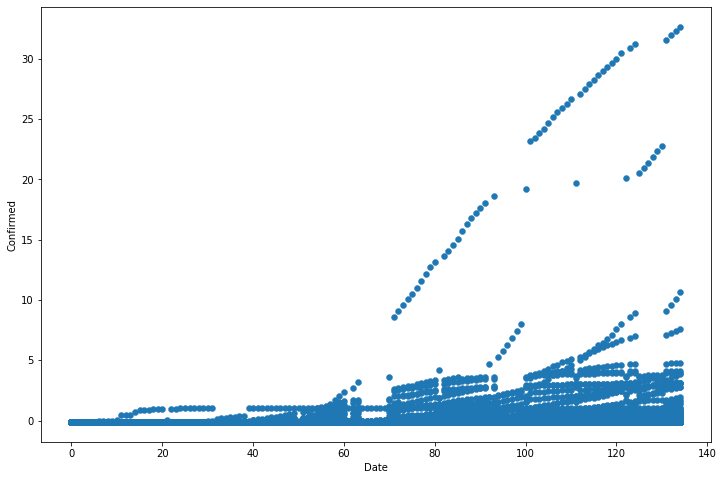

In [9]:
#посмотрим на результат нормализации
plt.figure(figsize=(12,8))
plt.scatter(data['Date'],data['Confirmed'], linewidth=0.4)

plt.xlabel('Date')
plt.ylabel('Confirmed')

**Выделяем целевую переменную**

В качестве целевой переменной выбираем Confirmed

In [10]:
target = data['Confirmed']
train = data.drop(['Confirmed'], axis=1) 

In [11]:
train.tail()

,Province/State,Country/Region,Date,Deaths,Recovered
35770,76,145,134,-0.112413,-0.141993
35771,76,185,134,-0.088662,-0.146309
35772,76,38,134,-0.115023,-0.142819
35773,76,166,134,-0.103017,-0.146309
35774,76,97,134,-0.115545,-0.146182


**Выделяем тренировочную и тестовую выборки**

y - целевая переменнная (target)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

25042 10733


## Визуальный анализ данных

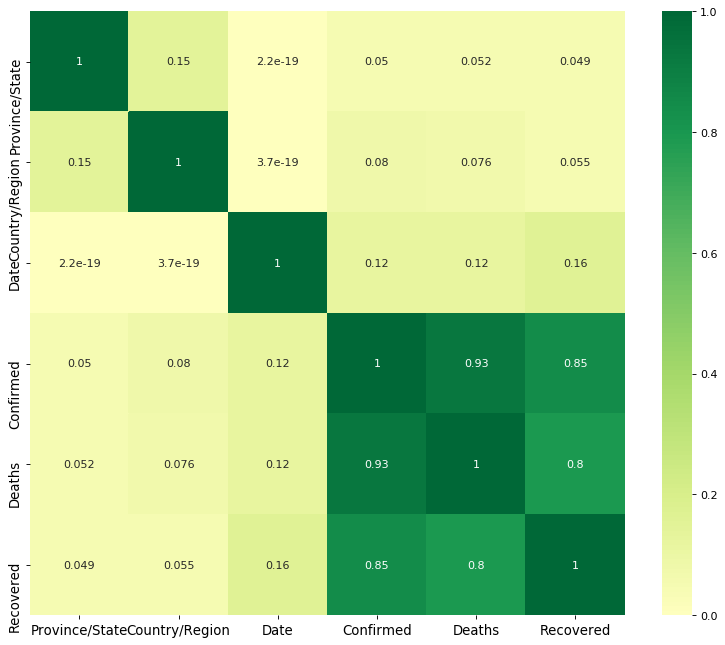

In [13]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Посроение предсказательной модели
## Линейная регрессия

In [14]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
linmodel.predict(X_test)

array([-0.03276826, -0.12327911, -0.10391766, ..., -0.1058434 ,
       -0.12469363, -0.10171744])

In [16]:
linmodel.score(X_test, y_test)

0.9129949494658905

# Метод главных компонент (PCA)

In [17]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [19]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,train.columns)))

1 component: 61.4% of initial variance
0.062 x Province/State + 0.998 x Country/Region + -0.003 x Date + 0.001 x Deaths + 0.001 x Recovered
2 component: 30.02% of initial variance
0.001 x Province/State + -0.003 x Country/Region + -1.000 x Date + -0.003 x Deaths + -0.004 x Recovered
3 component: 8.54% of initial variance
-0.998 x Province/State + 0.062 x Country/Region + -0.001 x Date + -0.002 x Deaths + -0.002 x Recovered
4 component: 0.03% of initial variance
-0.003 x Province/State + -0.001 x Country/Region + -0.005 x Date + 0.707 x Deaths + 0.707 x Recovered
5 component: 0.0% of initial variance
-0.000 x Province/State + 0.000 x Country/Region + -0.001 x Date + -0.707 x Deaths + 0.707 x Recovered


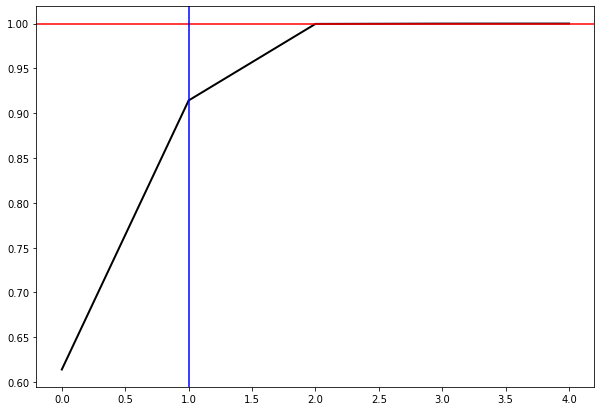

In [20]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(1, c='r')
plt.axvline(1, c='b')

Для описания 99.96% дисперсии данных достаточно 3 компонент.

**Визуализируем данные в двухмерном пердставлении с помощью алгоритма t-SNE**

In [21]:
from sklearn.manifold import TSNE
data_embedded = TSNE().fit_transform(train)
data_embedded

array([[-81.740814 ,   9.051263 ],
       [-81.64071  ,   9.115356 ],
       [-81.482895 ,   9.214677 ],
       ...,
       [-22.9626   ,  17.648987 ],
       [ -1.2596198,  65.14213  ],
       [  9.165268 ,  41.55937  ]], dtype=float32)

Text(0, 0.5, 'Y')

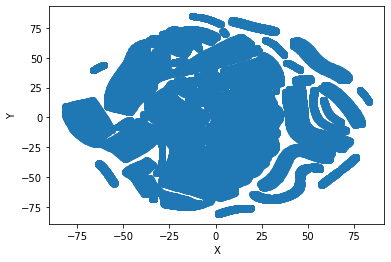

In [22]:
plt.figure()
plt.scatter([data_embedded[i][0] for i in range(0,35775)], [data_embedded[i][1] for i in range(0,35775)], linewidth=1)

plt.xlabel('X')
plt.ylabel('Y')

## Задача 4

## Построение линейных моделей

Для построения моделей используем классы RandomForestRegressor() и GradientBoostingRegressor() для регрессии методами случайного леса и градиентного бустинга соответственно

Используем тестовые и тренировочные выборки из предыдущего задания

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

**Регрессия методом случайного леса (Random Forest Regression)**

In [92]:
#строим модель
y_pred = RandomForestRegressor().fit(X_train, y_train).predict(X_test)
print(y_pred[0:20])

[-3.29663101e-03 -1.05424063e-01 -1.19186575e-01 -1.19386690e-01
 -1.19338797e-01 -1.19327058e-01 -1.17617493e-01 -1.19386690e-01
 -1.10729076e-01 -1.19277575e-01  4.21603721e+00 -1.04159621e-01
 -1.19100320e-01  1.48552984e-01 -1.19387299e-01 -9.32378335e-02
 -4.68104437e-03 -1.05950743e-01 -1.16993914e-01 -1.19386690e-01]


Оценим регрессионную модель с помощью среднеквадратичной ошибки и коэффицента детерминации

In [70]:
#Среднеквадратичная ошибка
rmse = mean_squared_error(y_test,y_pred,squared = False)
rmse

0.09496530346321273

In [71]:
#Коэффицент детерминации
r2 = r2_score(y_test,y_pred)
r2

0.9918420107516026

**Регрессия методом градиентного бустинга (Gradient Boosting Regression)**

In [29]:
#Строим модель
y2_pred = GradientBoostingRegressor().fit(X_train, y_train).predict(X_test)
print(y2_pred[0:20])

[ 0.01759823 -0.1003951  -0.11875337 -0.11709938 -0.11875337 -0.11709938
 -0.11709938 -0.11709938 -0.10828727 -0.11196735  4.37142042 -0.0906943
 -0.11709938  0.06868028 -0.11709938 -0.08245529 -0.0601205  -0.09442135
 -0.11709938 -0.11709938]


In [72]:
#Среднеквадратичная ошибка
rmse = mean_squared_error(y_test,y2_pred,squared = False)
rmse

0.11022911457548182

In [73]:
#Коэффицент детерминации
r_2 = r2_score(y_test,y2_pred)
r_2

0.989008781393835